# Topologia de Rede a partir da Dinâmica

Um problema difícil é estimar os parâmetros de rede relacionados a um processo dinâmico. Exemplos são Redes Sociais. Sabemos que o Instagram possui uma distribuição de grau dos nós assimétrica e provavelmente seguindo uma lei de potência, mas não podemos estimar o Clustering, Assortatividade, Diâmetro etc com precisão. Para o caso de redes de contato sexual, também acontece o mesmo problema. 

A ideia aqui é estimar esses parâmetros através do processo dinâmico relacionado a rede. No exemplo, classifico a série temporal dos infectados no modelo SIR entre ER, BA, WS e Waxman. É alcançado 87% de acurácia.

Como podemos aplicar isso no mundo real? Imagino que precisariamos de uma dinâmica que replica situações do mundo real e os dados associados

In [3]:
import EoN 
import os

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tqdm import tqdm
from aeon.transformations.collection.feature_based import Catch22
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
N = 1000 # network size
rho = 0.025 # initial fraction infected
tau = 0.5 # transmission rate per edge
gamma = 1 # recovery rate per node

## Simulation

In [ ]:
catch22_transformation = Catch22()

model_list = ['erdos_renyi', 'barabasi_linear', 'watts-strogatz', 'waxman']
simulation_dict = {}
labels = []
for network_model in model_list:
    for network_file in tqdm(os.listdir(f'../data/nets/{network_model}')):
        G = nx.read_edgelist(f'../data/nets/{network_model}/{network_file}')
        t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho)
        simulation_dict[network_file] = I
        labels.append(network_model)

In [5]:
X = Catch22().fit_transform([simulation_dict[i] for i in simulation_dict])

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(300, 22) (100, 22)


In [26]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
print(f'Model accuracy: {model.score(X_test, y_test)}')

Model accuracy: 0.87


## Plotting infected time series for different Topologies

(np.float64(0.0), np.float64(2023.35), np.float64(0.0), np.float64(0.50505))

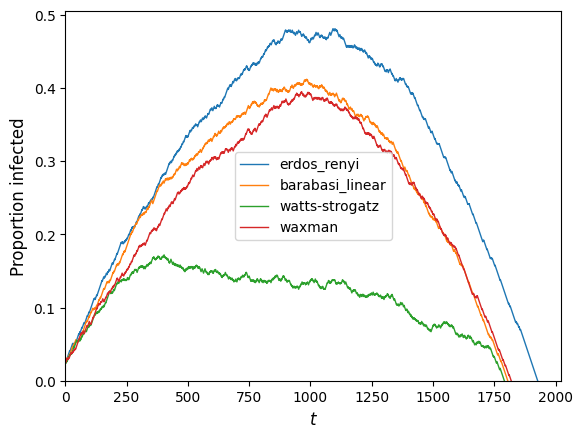

In [ ]:
for network_model in model_list:
    time_series = simulation_dict[f'{network_model}_0.edgelist']

    plt.plot(
        list(range(0, len(time_series))), 
        time_series*1./N, 
        '-',
        linewidth=1
    )
    
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'Proportion infected', fontsize=12)
plt.legend(model_list)

plt.axis(xmin=0, ymin=0)